In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.utils import shuffle

history={'loss':[]}

# 1.初始化参数
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)

    # 权重和偏置矩阵
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    # 通过字典存储参数
    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters


# 2.前向传播
def forward_propagation(X, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # 通过前向传播来计算a2
    z1 = np.dot(w1, X) + b1     # 这个地方需注意矩阵加法：虽然(w1*X)和b1的维度不同，但可以相加
    a1 = np.tanh(z1)            # 使用tanh作为第一层的激活函数
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))  # 使用sigmoid作为第二层的激活函数

    # 通过字典存储参数
    cache = {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}

    return a2, cache


# 3.计算代价函数
def compute_cost(a2, Y, parameters):
    m = Y.shape[1]      # Y的列数即为总的样本数

    # 采用交叉熵（cross-entropy）作为代价函数
    logprobs = np.multiply(np.log(a2), Y) + np.multiply((1 - Y), np.log(1 - a2))
    cost = - np.sum(logprobs) / m

    return cost


# 4.反向传播（计算代价函数的导数）
def backward_propagation(parameters, cache, X, Y):
    m = Y.shape[1]

    w2 = parameters['w2']

    a1 = cache['a1']
    a2 = cache['a2']

    # 反向传播，计算dw1、db1、dw2、db2
    dz2 = a2 - Y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2), 1 - np.power(a1, 2))
    dw1 = (1 / m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    grads = {'dw1': dw1, 'db1': db1, 'dw2': dw2, 'db2': db2}

    return grads


# 5.更新参数
def update_parameters(parameters, grads, learning_rate=0.0075):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']

    # 更新参数
    w1 = w1 - dw1 * learning_rate
    b1 = b1 - db1 * learning_rate
    w2 = w2 - dw2 * learning_rate
    b2 = b2 - db2 * learning_rate

    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters


# 建立神经网络
def nn_model(X, Y, n_h, n_input, n_output, num_iterations=10000, print_cost=False):
    np.random.seed(3)

    n_x = n_input           # 输入层节点数
    n_y = n_output          # 输出层节点数

    # 1.初始化参数
    parameters = initialize_parameters(n_x, n_h, n_y)

    # 梯度下降循环
    for i in range(0, num_iterations):
        # 2.前向传播
        a2, cache = forward_propagation(X, parameters)
        # 3.计算代价函数
        cost = compute_cost(a2, Y, parameters)
        # 4.反向传播
        grads = backward_propagation(parameters, cache, X, Y)
        # 5.更新参数
        parameters = update_parameters(parameters, grads)

        # 每1000次迭代，输出一次代价函数
        if print_cost and i % 1 == 0:
            print('迭代第%i次，代价函数为：%f' % (i, cost))
            history['loss'].append(cost)

    return parameters


# 对模型进行测试
def predict(parameters, x_test, y_test):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x_test) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))

    # 结果的维度
    n_rows = y_test.shape[0]
    n_cols = y_test.shape[1]

    # 预测值结果存储
    output = np.empty(shape=(n_rows, n_cols), dtype=int)

    # 取出每条测试数据的预测结果
    for i in range(n_cols):
        # 将每条测试数据的预测结果（概率）存为一个行向量
        temp = np.zeros(shape=n_rows)
        for j in range(n_rows):
            temp[j] = a2[j][i]

        # 将每条结果（概率）从小到大排序，并获得相应下标
        sorted_dist = np.argsort(temp)
        length = len(sorted_dist)

        # 将概率最大的置为1，其它置为0
        for k in range(length):
            if k == sorted_dist[length - 1]:
                output[k][i] = 1
            else:
                output[k][i] = 0

    print('预测结果：')
    print(output)
    print('真实结果：')
    print(y_test)

    count = 0
    for k in range(0, n_cols):
        if output[0][k] == y_test[0][k] and output[1][k] == y_test[1][k] :
            count = count + 1

    acc = count / int(y_test.shape[1]) * 100
    print('准确率：%.2f%%' % acc)
    
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], 'r', label='loss')
    plt.title('Training loss')
    plt.xlabel('Times')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
df = pd.read_csv('data/hiber_train.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:3]
y_train=data[:,3]
y_train=y_train.astype(int)

df = pd.read_csv('data/hiber_test.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:3]
y_test=data[:,3]
y_test=y_test.astype(int)
y_train = tf.one_hot(y_train,2)
y_test = tf.one_hot(y_test,2)
sess1=tf.Session()
y_train, y_test = sess1.run([y_train,y_test])

In [4]:
# 做了转置，将列转置为行
X_train=X_train.T 
X_test=X_test.T 
y_test=y_test.T 
y_train=y_train.T 

In [5]:
# 开始训练
start_time = datetime.datetime.now()
# 输入12个节点，隐层6个节点，输出3个节点，迭代10000次
parameters = nn_model(X_train, y_train, n_h=12, n_input=3, n_output=2, num_iterations=10000, print_cost=True)
end_time = datetime.datetime.now()
print("用时：" + str((end_time - start_time).seconds) + 's' + str(round((end_time - start_time).microseconds / 1000)) + 'ms')

迭代第0次，代价函数为：1.393719
迭代第1次，代价函数为：1.373141
迭代第2次，代价函数为：1.354114
迭代第3次，代价函数为：1.335984
迭代第4次，代价函数为：1.317537
迭代第5次，代价函数为：1.298253
迭代第6次，代价函数为：1.278199
迭代第7次，代价函数为：1.257660
迭代第8次，代价函数为：1.236975
迭代第9次，代价函数为：1.216455
迭代第10次，代价函数为：1.196344
迭代第11次，代价函数为：1.176807
迭代第12次，代价函数为：1.157943
迭代第13次，代价函数为：1.139798
迭代第14次，代价函数为：1.122386
迭代第15次，代价函数为：1.105701
迭代第16次，代价函数为：1.089727
迭代第17次，代价函数为：1.074438
迭代第18次，代价函数为：1.059808
迭代第19次，代价函数为：1.045808
迭代第20次，代价函数为：1.032410
迭代第21次，代价函数为：1.019585
迭代第22次，代价函数为：1.007306
迭代第23次，代价函数为：0.995544
迭代第24次，代价函数为：0.984276
迭代第25次，代价函数为：0.973475
迭代第26次，代价函数为：0.963120
迭代第27次，代价函数为：0.953187
迭代第28次，代价函数为：0.943656
迭代第29次，代价函数为：0.934507
迭代第30次，代价函数为：0.925721
迭代第31次，代价函数为：0.917280
迭代第32次，代价函数为：0.909168
迭代第33次，代价函数为：0.901368
迭代第34次，代价函数为：0.893865
迭代第35次，代价函数为：0.886645
迭代第36次，代价函数为：0.879694
迭代第37次，代价函数为：0.873001
迭代第38次，代价函数为：0.866552
迭代第39次，代价函数为：0.860336
迭代第40次，代价函数为：0.854343
迭代第41次，代价函数为：0.848562
迭代第42次，代价函数为：0.842984
迭代第43次，代价函数为：0.837599
迭代第44次，代价函数为：0.832399
迭代第45次，代价函数为：0.82737

迭代第372次，代价函数为：0.607839
迭代第373次，代价函数为：0.607757
迭代第374次，代价函数为：0.607677
迭代第375次，代价函数为：0.607596
迭代第376次，代价函数为：0.607516
迭代第377次，代价函数为：0.607437
迭代第378次，代价函数为：0.607358
迭代第379次，代价函数为：0.607279
迭代第380次，代价函数为：0.607201
迭代第381次，代价函数为：0.607124
迭代第382次，代价函数为：0.607046
迭代第383次，代价函数为：0.606969
迭代第384次，代价函数为：0.606893
迭代第385次，代价函数为：0.606817
迭代第386次，代价函数为：0.606741
迭代第387次，代价函数为：0.606666
迭代第388次，代价函数为：0.606591
迭代第389次，代价函数为：0.606516
迭代第390次，代价函数为：0.606442
迭代第391次，代价函数为：0.606368
迭代第392次，代价函数为：0.606295
迭代第393次，代价函数为：0.606222
迭代第394次，代价函数为：0.606149
迭代第395次，代价函数为：0.606077
迭代第396次，代价函数为：0.606005
迭代第397次，代价函数为：0.605934
迭代第398次，代价函数为：0.605863
迭代第399次，代价函数为：0.605792
迭代第400次，代价函数为：0.605722
迭代第401次，代价函数为：0.605652
迭代第402次，代价函数为：0.605582
迭代第403次，代价函数为：0.605513
迭代第404次，代价函数为：0.605444
迭代第405次，代价函数为：0.605375
迭代第406次，代价函数为：0.605307
迭代第407次，代价函数为：0.605239
迭代第408次，代价函数为：0.605171
迭代第409次，代价函数为：0.605104
迭代第410次，代价函数为：0.605037
迭代第411次，代价函数为：0.604970
迭代第412次，代价函数为：0.604904
迭代第413次，代价函数为：0.604838
迭代第414次，代价函数为：0.604773
迭代第415次，代价函

迭代第962次，代价函数为：0.589549
迭代第963次，代价函数为：0.589537
迭代第964次，代价函数为：0.589525
迭代第965次，代价函数为：0.589513
迭代第966次，代价函数为：0.589502
迭代第967次，代价函数为：0.589490
迭代第968次，代价函数为：0.589478
迭代第969次，代价函数为：0.589467
迭代第970次，代价函数为：0.589455
迭代第971次，代价函数为：0.589444
迭代第972次，代价函数为：0.589432
迭代第973次，代价函数为：0.589421
迭代第974次，代价函数为：0.589409
迭代第975次，代价函数为：0.589398
迭代第976次，代价函数为：0.589386
迭代第977次，代价函数为：0.589375
迭代第978次，代价函数为：0.589363
迭代第979次，代价函数为：0.589352
迭代第980次，代价函数为：0.589341
迭代第981次，代价函数为：0.589329
迭代第982次，代价函数为：0.589318
迭代第983次，代价函数为：0.589307
迭代第984次，代价函数为：0.589295
迭代第985次，代价函数为：0.589284
迭代第986次，代价函数为：0.589273
迭代第987次，代价函数为：0.589262
迭代第988次，代价函数为：0.589250
迭代第989次，代价函数为：0.589239
迭代第990次，代价函数为：0.589228
迭代第991次，代价函数为：0.589217
迭代第992次，代价函数为：0.589206
迭代第993次，代价函数为：0.589195
迭代第994次，代价函数为：0.589184
迭代第995次，代价函数为：0.589173
迭代第996次，代价函数为：0.589162
迭代第997次，代价函数为：0.589151
迭代第998次，代价函数为：0.589140
迭代第999次，代价函数为：0.589129
迭代第1000次，代价函数为：0.589118
迭代第1001次，代价函数为：0.589107
迭代第1002次，代价函数为：0.589096
迭代第1003次，代价函数为：0.589085
迭代第1004次，代价函数为：0.589074
迭代第100

迭代第1505次，代价函数为：0.577154
迭代第1506次，代价函数为：0.577102
迭代第1507次，代价函数为：0.577051
迭代第1508次，代价函数为：0.577000
迭代第1509次，代价函数为：0.576948
迭代第1510次，代价函数为：0.576897
迭代第1511次，代价函数为：0.576845
迭代第1512次，代价函数为：0.576794
迭代第1513次，代价函数为：0.576742
迭代第1514次，代价函数为：0.576690
迭代第1515次，代价函数为：0.576639
迭代第1516次，代价函数为：0.576587
迭代第1517次，代价函数为：0.576535
迭代第1518次，代价函数为：0.576483
迭代第1519次，代价函数为：0.576432
迭代第1520次，代价函数为：0.576380
迭代第1521次，代价函数为：0.576328
迭代第1522次，代价函数为：0.576276
迭代第1523次，代价函数为：0.576224
迭代第1524次，代价函数为：0.576172
迭代第1525次，代价函数为：0.576119
迭代第1526次，代价函数为：0.576067
迭代第1527次，代价函数为：0.576015
迭代第1528次，代价函数为：0.575963
迭代第1529次，代价函数为：0.575910
迭代第1530次，代价函数为：0.575858
迭代第1531次，代价函数为：0.575806
迭代第1532次，代价函数为：0.575753
迭代第1533次，代价函数为：0.575701
迭代第1534次，代价函数为：0.575648
迭代第1535次，代价函数为：0.575596
迭代第1536次，代价函数为：0.575543
迭代第1537次，代价函数为：0.575491
迭代第1538次，代价函数为：0.575438
迭代第1539次，代价函数为：0.575386
迭代第1540次，代价函数为：0.575333
迭代第1541次，代价函数为：0.575280
迭代第1542次，代价函数为：0.575227
迭代第1543次，代价函数为：0.575175
迭代第1544次，代价函数为：0.575122
迭代第1545次，代价函数为：0.575069
迭代第1546次，代价函数为：0

迭代第2007次，代价函数为：0.552486
迭代第2008次，代价函数为：0.552446
迭代第2009次，代价函数为：0.552406
迭代第2010次，代价函数为：0.552366
迭代第2011次，代价函数为：0.552327
迭代第2012次，代价函数为：0.552287
迭代第2013次，代价函数为：0.552247
迭代第2014次，代价函数为：0.552208
迭代第2015次，代价函数为：0.552168
迭代第2016次，代价函数为：0.552129
迭代第2017次，代价函数为：0.552089
迭代第2018次，代价函数为：0.552050
迭代第2019次，代价函数为：0.552011
迭代第2020次，代价函数为：0.551971
迭代第2021次，代价函数为：0.551932
迭代第2022次，代价函数为：0.551893
迭代第2023次，代价函数为：0.551854
迭代第2024次，代价函数为：0.551815
迭代第2025次，代价函数为：0.551776
迭代第2026次，代价函数为：0.551737
迭代第2027次，代价函数为：0.551698
迭代第2028次，代价函数为：0.551659
迭代第2029次，代价函数为：0.551620
迭代第2030次，代价函数为：0.551581
迭代第2031次，代价函数为：0.551542
迭代第2032次，代价函数为：0.551504
迭代第2033次，代价函数为：0.551465
迭代第2034次，代价函数为：0.551426
迭代第2035次，代价函数为：0.551388
迭代第2036次，代价函数为：0.551349
迭代第2037次，代价函数为：0.551311
迭代第2038次，代价函数为：0.551272
迭代第2039次，代价函数为：0.551234
迭代第2040次，代价函数为：0.551195
迭代第2041次，代价函数为：0.551157
迭代第2042次，代价函数为：0.551119
迭代第2043次，代价函数为：0.551081
迭代第2044次，代价函数为：0.551043
迭代第2045次，代价函数为：0.551004
迭代第2046次，代价函数为：0.550966
迭代第2047次，代价函数为：0.550928
迭代第2048次，代价函数为：0

迭代第2466次，代价函数为：0.538844
迭代第2467次，代价函数为：0.538824
迭代第2468次，代价函数为：0.538803
迭代第2469次，代价函数为：0.538782
迭代第2470次，代价函数为：0.538762
迭代第2471次，代价函数为：0.538741
迭代第2472次，代价函数为：0.538721
迭代第2473次，代价函数为：0.538701
迭代第2474次，代价函数为：0.538680
迭代第2475次，代价函数为：0.538660
迭代第2476次，代价函数为：0.538640
迭代第2477次，代价函数为：0.538619
迭代第2478次，代价函数为：0.538599
迭代第2479次，代价函数为：0.538579
迭代第2480次，代价函数为：0.538559
迭代第2481次，代价函数为：0.538539
迭代第2482次，代价函数为：0.538518
迭代第2483次，代价函数为：0.538498
迭代第2484次，代价函数为：0.538478
迭代第2485次，代价函数为：0.538458
迭代第2486次，代价函数为：0.538438
迭代第2487次，代价函数为：0.538418
迭代第2488次，代价函数为：0.538398
迭代第2489次，代价函数为：0.538379
迭代第2490次，代价函数为：0.538359
迭代第2491次，代价函数为：0.538339
迭代第2492次，代价函数为：0.538319
迭代第2493次，代价函数为：0.538299
迭代第2494次，代价函数为：0.538280
迭代第2495次，代价函数为：0.538260
迭代第2496次，代价函数为：0.538240
迭代第2497次，代价函数为：0.538221
迭代第2498次，代价函数为：0.538201
迭代第2499次，代价函数为：0.538182
迭代第2500次，代价函数为：0.538162
迭代第2501次，代价函数为：0.538143
迭代第2502次，代价函数为：0.538123
迭代第2503次，代价函数为：0.538104
迭代第2504次，代价函数为：0.538084
迭代第2505次，代价函数为：0.538065
迭代第2506次，代价函数为：0.538046
迭代第2507次，代价函数为：0

迭代第2972次，代价函数为：0.531800
迭代第2973次，代价函数为：0.531791
迭代第2974次，代价函数为：0.531782
迭代第2975次，代价函数为：0.531773
迭代第2976次，代价函数为：0.531765
迭代第2977次，代价函数为：0.531756
迭代第2978次，代价函数为：0.531747
迭代第2979次，代价函数为：0.531739
迭代第2980次，代价函数为：0.531730
迭代第2981次，代价函数为：0.531721
迭代第2982次，代价函数为：0.531713
迭代第2983次，代价函数为：0.531704
迭代第2984次，代价函数为：0.531695
迭代第2985次，代价函数为：0.531687
迭代第2986次，代价函数为：0.531678
迭代第2987次，代价函数为：0.531670
迭代第2988次，代价函数为：0.531661
迭代第2989次，代价函数为：0.531652
迭代第2990次，代价函数为：0.531644
迭代第2991次，代价函数为：0.531635
迭代第2992次，代价函数为：0.531627
迭代第2993次，代价函数为：0.531618
迭代第2994次，代价函数为：0.531610
迭代第2995次，代价函数为：0.531601
迭代第2996次，代价函数为：0.531593
迭代第2997次，代价函数为：0.531585
迭代第2998次，代价函数为：0.531576
迭代第2999次，代价函数为：0.531568
迭代第3000次，代价函数为：0.531559
迭代第3001次，代价函数为：0.531551
迭代第3002次，代价函数为：0.531543
迭代第3003次，代价函数为：0.531534
迭代第3004次，代价函数为：0.531526
迭代第3005次，代价函数为：0.531518
迭代第3006次，代价函数为：0.531509
迭代第3007次，代价函数为：0.531501
迭代第3008次，代价函数为：0.531493
迭代第3009次，代价函数为：0.531484
迭代第3010次，代价函数为：0.531476
迭代第3011次，代价函数为：0.531468
迭代第3012次，代价函数为：0.531460
迭代第3013次，代价函数为：0

迭代第3506次，代价函数为：0.528689
迭代第3507次，代价函数为：0.528686
迭代第3508次，代价函数为：0.528682
迭代第3509次，代价函数为：0.528678
迭代第3510次，代价函数为：0.528675
迭代第3511次，代价函数为：0.528671
迭代第3512次，代价函数为：0.528667
迭代第3513次，代价函数为：0.528664
迭代第3514次，代价函数为：0.528660
迭代第3515次，代价函数为：0.528656
迭代第3516次，代价函数为：0.528653
迭代第3517次，代价函数为：0.528649
迭代第3518次，代价函数为：0.528646
迭代第3519次，代价函数为：0.528642
迭代第3520次，代价函数为：0.528638
迭代第3521次，代价函数为：0.528635
迭代第3522次，代价函数为：0.528631
迭代第3523次，代价函数为：0.528628
迭代第3524次，代价函数为：0.528624
迭代第3525次，代价函数为：0.528620
迭代第3526次，代价函数为：0.528617
迭代第3527次，代价函数为：0.528613
迭代第3528次，代价函数为：0.528610
迭代第3529次，代价函数为：0.528606
迭代第3530次，代价函数为：0.528603
迭代第3531次，代价函数为：0.528599
迭代第3532次，代价函数为：0.528596
迭代第3533次，代价函数为：0.528592
迭代第3534次，代价函数为：0.528589
迭代第3535次，代价函数为：0.528585
迭代第3536次，代价函数为：0.528582
迭代第3537次，代价函数为：0.528578
迭代第3538次，代价函数为：0.528575
迭代第3539次，代价函数为：0.528571
迭代第3540次，代价函数为：0.528568
迭代第3541次，代价函数为：0.528564
迭代第3542次，代价函数为：0.528561
迭代第3543次，代价函数为：0.528557
迭代第3544次，代价函数为：0.528554
迭代第3545次，代价函数为：0.528550
迭代第3546次，代价函数为：0.528547
迭代第3547次，代价函数为：0

迭代第3903次，代价函数为：0.527590
迭代第3904次，代价函数为：0.527587
迭代第3905次，代价函数为：0.527585
迭代第3906次，代价函数为：0.527583
迭代第3907次，代价函数为：0.527581
迭代第3908次，代价函数为：0.527579
迭代第3909次，代价函数为：0.527577
迭代第3910次，代价函数为：0.527575
迭代第3911次，代价函数为：0.527573
迭代第3912次，代价函数为：0.527571
迭代第3913次，代价函数为：0.527569
迭代第3914次，代价函数为：0.527567
迭代第3915次，代价函数为：0.527565
迭代第3916次，代价函数为：0.527563
迭代第3917次，代价函数为：0.527561
迭代第3918次，代价函数为：0.527559
迭代第3919次，代价函数为：0.527557
迭代第3920次，代价函数为：0.527555
迭代第3921次，代价函数为：0.527553
迭代第3922次，代价函数为：0.527551
迭代第3923次，代价函数为：0.527549
迭代第3924次，代价函数为：0.527547
迭代第3925次，代价函数为：0.527545
迭代第3926次，代价函数为：0.527543
迭代第3927次，代价函数为：0.527541
迭代第3928次，代价函数为：0.527539
迭代第3929次，代价函数为：0.527537
迭代第3930次，代价函数为：0.527535
迭代第3931次，代价函数为：0.527533
迭代第3932次，代价函数为：0.527531
迭代第3933次，代价函数为：0.527529
迭代第3934次，代价函数为：0.527527
迭代第3935次，代价函数为：0.527525
迭代第3936次，代价函数为：0.527523
迭代第3937次，代价函数为：0.527521
迭代第3938次，代价函数为：0.527519
迭代第3939次，代价函数为：0.527517
迭代第3940次，代价函数为：0.527515
迭代第3941次，代价函数为：0.527513
迭代第3942次，代价函数为：0.527511
迭代第3943次，代价函数为：0.527509
迭代第3944次，代价函数为：0

迭代第4355次，代价函数为：0.526880
迭代第4356次，代价函数为：0.526879
迭代第4357次，代价函数为：0.526877
迭代第4358次，代价函数为：0.526876
迭代第4359次，代价函数为：0.526875
迭代第4360次，代价函数为：0.526874
迭代第4361次，代价函数为：0.526873
迭代第4362次，代价函数为：0.526871
迭代第4363次，代价函数为：0.526870
迭代第4364次，代价函数为：0.526869
迭代第4365次，代价函数为：0.526868
迭代第4366次，代价函数为：0.526867
迭代第4367次，代价函数为：0.526866
迭代第4368次，代价函数为：0.526864
迭代第4369次，代价函数为：0.526863
迭代第4370次，代价函数为：0.526862
迭代第4371次，代价函数为：0.526861
迭代第4372次，代价函数为：0.526860
迭代第4373次，代价函数为：0.526859
迭代第4374次，代价函数为：0.526857
迭代第4375次，代价函数为：0.526856
迭代第4376次，代价函数为：0.526855
迭代第4377次，代价函数为：0.526854
迭代第4378次，代价函数为：0.526853
迭代第4379次，代价函数为：0.526852
迭代第4380次，代价函数为：0.526850
迭代第4381次，代价函数为：0.526849
迭代第4382次，代价函数为：0.526848
迭代第4383次，代价函数为：0.526847
迭代第4384次，代价函数为：0.526846
迭代第4385次，代价函数为：0.526845
迭代第4386次，代价函数为：0.526843
迭代第4387次，代价函数为：0.526842
迭代第4388次，代价函数为：0.526841
迭代第4389次，代价函数为：0.526840
迭代第4390次，代价函数为：0.526839
迭代第4391次，代价函数为：0.526838
迭代第4392次，代价函数为：0.526837
迭代第4393次，代价函数为：0.526835
迭代第4394次，代价函数为：0.526834
迭代第4395次，代价函数为：0.526833
迭代第4396次，代价函数为：0

迭代第4746次，代价函数为：0.526494
迭代第4747次，代价函数为：0.526494
迭代第4748次，代价函数为：0.526493
迭代第4749次，代价函数为：0.526492
迭代第4750次，代价函数为：0.526491
迭代第4751次，代价函数为：0.526490
迭代第4752次，代价函数为：0.526490
迭代第4753次，代价函数为：0.526489
迭代第4754次，代价函数为：0.526488
迭代第4755次，代价函数为：0.526487
迭代第4756次，代价函数为：0.526486
迭代第4757次，代价函数为：0.526485
迭代第4758次，代价函数为：0.526485
迭代第4759次，代价函数为：0.526484
迭代第4760次，代价函数为：0.526483
迭代第4761次，代价函数为：0.526482
迭代第4762次，代价函数为：0.526481
迭代第4763次，代价函数为：0.526481
迭代第4764次，代价函数为：0.526480
迭代第4765次，代价函数为：0.526479
迭代第4766次，代价函数为：0.526478
迭代第4767次，代价函数为：0.526477
迭代第4768次，代价函数为：0.526477
迭代第4769次，代价函数为：0.526476
迭代第4770次，代价函数为：0.526475
迭代第4771次，代价函数为：0.526474
迭代第4772次，代价函数为：0.526473
迭代第4773次，代价函数为：0.526473
迭代第4774次，代价函数为：0.526472
迭代第4775次，代价函数为：0.526471
迭代第4776次，代价函数为：0.526470
迭代第4777次，代价函数为：0.526469
迭代第4778次，代价函数为：0.526469
迭代第4779次，代价函数为：0.526468
迭代第4780次，代价函数为：0.526467
迭代第4781次，代价函数为：0.526466
迭代第4782次，代价函数为：0.526465
迭代第4783次，代价函数为：0.526465
迭代第4784次，代价函数为：0.526464
迭代第4785次，代价函数为：0.526463
迭代第4786次，代价函数为：0.526462
迭代第4787次，代价函数为：0

迭代第5152次，代价函数为：0.526210
迭代第5153次，代价函数为：0.526209
迭代第5154次，代价函数为：0.526209
迭代第5155次，代价函数为：0.526208
迭代第5156次，代价函数为：0.526207
迭代第5157次，代价函数为：0.526207
迭代第5158次，代价函数为：0.526206
迭代第5159次，代价函数为：0.526206
迭代第5160次，代价函数为：0.526205
迭代第5161次，代价函数为：0.526204
迭代第5162次，代价函数为：0.526204
迭代第5163次，代价函数为：0.526203
迭代第5164次，代价函数为：0.526203
迭代第5165次，代价函数为：0.526202
迭代第5166次，代价函数为：0.526201
迭代第5167次，代价函数为：0.526201
迭代第5168次，代价函数为：0.526200
迭代第5169次，代价函数为：0.526200
迭代第5170次，代价函数为：0.526199
迭代第5171次，代价函数为：0.526198
迭代第5172次，代价函数为：0.526198
迭代第5173次，代价函数为：0.526197
迭代第5174次，代价函数为：0.526197
迭代第5175次，代价函数为：0.526196
迭代第5176次，代价函数为：0.526196
迭代第5177次，代价函数为：0.526195
迭代第5178次，代价函数为：0.526194
迭代第5179次，代价函数为：0.526194
迭代第5180次，代价函数为：0.526193
迭代第5181次，代价函数为：0.526193
迭代第5182次，代价函数为：0.526192
迭代第5183次，代价函数为：0.526191
迭代第5184次，代价函数为：0.526191
迭代第5185次，代价函数为：0.526190
迭代第5186次，代价函数为：0.526190
迭代第5187次，代价函数为：0.526189
迭代第5188次，代价函数为：0.526188
迭代第5189次，代价函数为：0.526188
迭代第5190次，代价函数为：0.526187
迭代第5191次，代价函数为：0.526187
迭代第5192次，代价函数为：0.526186
迭代第5193次，代价函数为：0

迭代第5610次，代价函数为：0.525969
迭代第5611次，代价函数为：0.525968
迭代第5612次，代价函数为：0.525968
迭代第5613次，代价函数为：0.525967
迭代第5614次，代价函数为：0.525967
迭代第5615次，代价函数为：0.525966
迭代第5616次，代价函数为：0.525966
迭代第5617次，代价函数为：0.525965
迭代第5618次，代价函数为：0.525965
迭代第5619次，代价函数为：0.525964
迭代第5620次，代价函数为：0.525964
迭代第5621次，代价函数为：0.525963
迭代第5622次，代价函数为：0.525963
迭代第5623次，代价函数为：0.525963
迭代第5624次，代价函数为：0.525962
迭代第5625次，代价函数为：0.525962
迭代第5626次，代价函数为：0.525961
迭代第5627次，代价函数为：0.525961
迭代第5628次，代价函数为：0.525960
迭代第5629次，代价函数为：0.525960
迭代第5630次，代价函数为：0.525959
迭代第5631次，代价函数为：0.525959
迭代第5632次，代价函数为：0.525958
迭代第5633次，代价函数为：0.525958
迭代第5634次，代价函数为：0.525957
迭代第5635次，代价函数为：0.525957
迭代第5636次，代价函数为：0.525957
迭代第5637次，代价函数为：0.525956
迭代第5638次，代价函数为：0.525956
迭代第5639次，代价函数为：0.525955
迭代第5640次，代价函数为：0.525955
迭代第5641次，代价函数为：0.525954
迭代第5642次，代价函数为：0.525954
迭代第5643次，代价函数为：0.525953
迭代第5644次，代价函数为：0.525953
迭代第5645次，代价函数为：0.525952
迭代第5646次，代价函数为：0.525952
迭代第5647次，代价函数为：0.525952
迭代第5648次，代价函数为：0.525951
迭代第5649次，代价函数为：0.525951
迭代第5650次，代价函数为：0.525950
迭代第5651次，代价函数为：0

迭代第6028次，代价函数为：0.525793
迭代第6029次，代价函数为：0.525793
迭代第6030次，代价函数为：0.525792
迭代第6031次，代价函数为：0.525792
迭代第6032次，代价函数为：0.525792
迭代第6033次，代价函数为：0.525791
迭代第6034次，代价函数为：0.525791
迭代第6035次，代价函数为：0.525790
迭代第6036次，代价函数为：0.525790
迭代第6037次，代价函数为：0.525790
迭代第6038次，代价函数为：0.525789
迭代第6039次，代价函数为：0.525789
迭代第6040次，代价函数为：0.525789
迭代第6041次，代价函数为：0.525788
迭代第6042次，代价函数为：0.525788
迭代第6043次，代价函数为：0.525787
迭代第6044次，代价函数为：0.525787
迭代第6045次，代价函数为：0.525787
迭代第6046次，代价函数为：0.525786
迭代第6047次，代价函数为：0.525786
迭代第6048次，代价函数为：0.525785
迭代第6049次，代价函数为：0.525785
迭代第6050次，代价函数为：0.525785
迭代第6051次，代价函数为：0.525784
迭代第6052次，代价函数为：0.525784
迭代第6053次，代价函数为：0.525784
迭代第6054次，代价函数为：0.525783
迭代第6055次，代价函数为：0.525783
迭代第6056次，代价函数为：0.525782
迭代第6057次，代价函数为：0.525782
迭代第6058次，代价函数为：0.525782
迭代第6059次，代价函数为：0.525781
迭代第6060次，代价函数为：0.525781
迭代第6061次，代价函数为：0.525781
迭代第6062次，代价函数为：0.525780
迭代第6063次，代价函数为：0.525780
迭代第6064次，代价函数为：0.525779
迭代第6065次，代价函数为：0.525779
迭代第6066次，代价函数为：0.525779
迭代第6067次，代价函数为：0.525778
迭代第6068次，代价函数为：0.525778
迭代第6069次，代价函数为：0

迭代第6464次，代价函数为：0.525640
迭代第6465次，代价函数为：0.525640
迭代第6466次，代价函数为：0.525640
迭代第6467次，代价函数为：0.525639
迭代第6468次，代价函数为：0.525639
迭代第6469次，代价函数为：0.525639
迭代第6470次，代价函数为：0.525638
迭代第6471次，代价函数为：0.525638
迭代第6472次，代价函数为：0.525638
迭代第6473次，代价函数为：0.525637
迭代第6474次，代价函数为：0.525637
迭代第6475次，代价函数为：0.525637
迭代第6476次，代价函数为：0.525636
迭代第6477次，代价函数为：0.525636
迭代第6478次，代价函数为：0.525636
迭代第6479次，代价函数为：0.525636
迭代第6480次，代价函数为：0.525635
迭代第6481次，代价函数为：0.525635
迭代第6482次，代价函数为：0.525635
迭代第6483次，代价函数为：0.525634
迭代第6484次，代价函数为：0.525634
迭代第6485次，代价函数为：0.525634
迭代第6486次，代价函数为：0.525633
迭代第6487次，代价函数为：0.525633
迭代第6488次，代价函数为：0.525633
迭代第6489次，代价函数为：0.525632
迭代第6490次，代价函数为：0.525632
迭代第6491次，代价函数为：0.525632
迭代第6492次，代价函数为：0.525631
迭代第6493次，代价函数为：0.525631
迭代第6494次，代价函数为：0.525631
迭代第6495次，代价函数为：0.525630
迭代第6496次，代价函数为：0.525630
迭代第6497次，代价函数为：0.525630
迭代第6498次，代价函数为：0.525629
迭代第6499次，代价函数为：0.525629
迭代第6500次，代价函数为：0.525629
迭代第6501次，代价函数为：0.525628
迭代第6502次，代价函数为：0.525628
迭代第6503次，代价函数为：0.525628
迭代第6504次，代价函数为：0.525628
迭代第6505次，代价函数为：0

迭代第6926次，代价函数为：0.525503
迭代第6927次，代价函数为：0.525503
迭代第6928次，代价函数为：0.525502
迭代第6929次，代价函数为：0.525502
迭代第6930次，代价函数为：0.525502
迭代第6931次，代价函数为：0.525501
迭代第6932次，代价函数为：0.525501
迭代第6933次，代价函数为：0.525501
迭代第6934次，代价函数为：0.525501
迭代第6935次，代价函数为：0.525500
迭代第6936次，代价函数为：0.525500
迭代第6937次，代价函数为：0.525500
迭代第6938次，代价函数为：0.525499
迭代第6939次，代价函数为：0.525499
迭代第6940次，代价函数为：0.525499
迭代第6941次，代价函数为：0.525499
迭代第6942次，代价函数为：0.525498
迭代第6943次，代价函数为：0.525498
迭代第6944次，代价函数为：0.525498
迭代第6945次，代价函数为：0.525498
迭代第6946次，代价函数为：0.525497
迭代第6947次，代价函数为：0.525497
迭代第6948次，代价函数为：0.525497
迭代第6949次，代价函数为：0.525496
迭代第6950次，代价函数为：0.525496
迭代第6951次，代价函数为：0.525496
迭代第6952次，代价函数为：0.525496
迭代第6953次，代价函数为：0.525495
迭代第6954次，代价函数为：0.525495
迭代第6955次，代价函数为：0.525495
迭代第6956次，代价函数为：0.525495
迭代第6957次，代价函数为：0.525494
迭代第6958次，代价函数为：0.525494
迭代第6959次，代价函数为：0.525494
迭代第6960次，代价函数为：0.525493
迭代第6961次，代价函数为：0.525493
迭代第6962次，代价函数为：0.525493
迭代第6963次，代价函数为：0.525493
迭代第6964次，代价函数为：0.525492
迭代第6965次，代价函数为：0.525492
迭代第6966次，代价函数为：0.525492
迭代第6967次，代价函数为：0

迭代第7405次，代价函数为：0.525380
迭代第7406次，代价函数为：0.525380
迭代第7407次，代价函数为：0.525380
迭代第7408次，代价函数为：0.525379
迭代第7409次，代价函数为：0.525379
迭代第7410次，代价函数为：0.525379
迭代第7411次，代价函数为：0.525379
迭代第7412次，代价函数为：0.525378
迭代第7413次，代价函数为：0.525378
迭代第7414次，代价函数为：0.525378
迭代第7415次，代价函数为：0.525378
迭代第7416次，代价函数为：0.525378
迭代第7417次，代价函数为：0.525377
迭代第7418次，代价函数为：0.525377
迭代第7419次，代价函数为：0.525377
迭代第7420次，代价函数为：0.525377
迭代第7421次，代价函数为：0.525376
迭代第7422次，代价函数为：0.525376
迭代第7423次，代价函数为：0.525376
迭代第7424次，代价函数为：0.525376
迭代第7425次，代价函数为：0.525375
迭代第7426次，代价函数为：0.525375
迭代第7427次，代价函数为：0.525375
迭代第7428次，代价函数为：0.525375
迭代第7429次，代价函数为：0.525374
迭代第7430次，代价函数为：0.525374
迭代第7431次，代价函数为：0.525374
迭代第7432次，代价函数为：0.525374
迭代第7433次，代价函数为：0.525374
迭代第7434次，代价函数为：0.525373
迭代第7435次，代价函数为：0.525373
迭代第7436次，代价函数为：0.525373
迭代第7437次，代价函数为：0.525373
迭代第7438次，代价函数为：0.525372
迭代第7439次，代价函数为：0.525372
迭代第7440次，代价函数为：0.525372
迭代第7441次，代价函数为：0.525372
迭代第7442次，代价函数为：0.525371
迭代第7443次，代价函数为：0.525371
迭代第7444次，代价函数为：0.525371
迭代第7445次，代价函数为：0.525371
迭代第7446次，代价函数为：0

迭代第7927次，代价函数为：0.525265
迭代第7928次，代价函数为：0.525264
迭代第7929次，代价函数为：0.525264
迭代第7930次，代价函数为：0.525264
迭代第7931次，代价函数为：0.525264
迭代第7932次，代价函数为：0.525263
迭代第7933次，代价函数为：0.525263
迭代第7934次，代价函数为：0.525263
迭代第7935次，代价函数为：0.525263
迭代第7936次，代价函数为：0.525263
迭代第7937次，代价函数为：0.525262
迭代第7938次，代价函数为：0.525262
迭代第7939次，代价函数为：0.525262
迭代第7940次，代价函数为：0.525262
迭代第7941次，代价函数为：0.525262
迭代第7942次，代价函数为：0.525261
迭代第7943次，代价函数为：0.525261
迭代第7944次，代价函数为：0.525261
迭代第7945次，代价函数为：0.525261
迭代第7946次，代价函数为：0.525261
迭代第7947次，代价函数为：0.525260
迭代第7948次，代价函数为：0.525260
迭代第7949次，代价函数为：0.525260
迭代第7950次，代价函数为：0.525260
迭代第7951次，代价函数为：0.525260
迭代第7952次，代价函数为：0.525259
迭代第7953次，代价函数为：0.525259
迭代第7954次，代价函数为：0.525259
迭代第7955次，代价函数为：0.525259
迭代第7956次，代价函数为：0.525259
迭代第7957次，代价函数为：0.525258
迭代第7958次，代价函数为：0.525258
迭代第7959次，代价函数为：0.525258
迭代第7960次，代价函数为：0.525258
迭代第7961次，代价函数为：0.525258
迭代第7962次，代价函数为：0.525257
迭代第7963次，代价函数为：0.525257
迭代第7964次，代价函数为：0.525257
迭代第7965次，代价函数为：0.525257
迭代第7966次，代价函数为：0.525257
迭代第7967次，代价函数为：0.525256
迭代第7968次，代价函数为：0

迭代第8460次，代价函数为：0.525162
迭代第8461次，代价函数为：0.525161
迭代第8462次，代价函数为：0.525161
迭代第8463次，代价函数为：0.525161
迭代第8464次，代价函数为：0.525161
迭代第8465次，代价函数为：0.525161
迭代第8466次，代价函数为：0.525161
迭代第8467次，代价函数为：0.525160
迭代第8468次，代价函数为：0.525160
迭代第8469次，代价函数为：0.525160
迭代第8470次，代价函数为：0.525160
迭代第8471次，代价函数为：0.525160
迭代第8472次，代价函数为：0.525159
迭代第8473次，代价函数为：0.525159
迭代第8474次，代价函数为：0.525159
迭代第8475次，代价函数为：0.525159
迭代第8476次，代价函数为：0.525159
迭代第8477次，代价函数为：0.525159
迭代第8478次，代价函数为：0.525158
迭代第8479次，代价函数为：0.525158
迭代第8480次，代价函数为：0.525158
迭代第8481次，代价函数为：0.525158
迭代第8482次，代价函数为：0.525158
迭代第8483次，代价函数为：0.525158
迭代第8484次，代价函数为：0.525157
迭代第8485次，代价函数为：0.525157
迭代第8486次，代价函数为：0.525157
迭代第8487次，代价函数为：0.525157
迭代第8488次，代价函数为：0.525157
迭代第8489次，代价函数为：0.525156
迭代第8490次，代价函数为：0.525156
迭代第8491次，代价函数为：0.525156
迭代第8492次，代价函数为：0.525156
迭代第8493次，代价函数为：0.525156
迭代第8494次，代价函数为：0.525156
迭代第8495次，代价函数为：0.525155
迭代第8496次，代价函数为：0.525155
迭代第8497次，代价函数为：0.525155
迭代第8498次，代价函数为：0.525155
迭代第8499次，代价函数为：0.525155
迭代第8500次，代价函数为：0.525154
迭代第8501次，代价函数为：0

迭代第8976次，代价函数为：0.525073
迭代第8977次，代价函数为：0.525073
迭代第8978次，代价函数为：0.525073
迭代第8979次，代价函数为：0.525073
迭代第8980次，代价函数为：0.525073
迭代第8981次，代价函数为：0.525072
迭代第8982次，代价函数为：0.525072
迭代第8983次，代价函数为：0.525072
迭代第8984次，代价函数为：0.525072
迭代第8985次，代价函数为：0.525072
迭代第8986次，代价函数为：0.525072
迭代第8987次，代价函数为：0.525071
迭代第8988次，代价函数为：0.525071
迭代第8989次，代价函数为：0.525071
迭代第8990次，代价函数为：0.525071
迭代第8991次，代价函数为：0.525071
迭代第8992次，代价函数为：0.525071
迭代第8993次，代价函数为：0.525070
迭代第8994次，代价函数为：0.525070
迭代第8995次，代价函数为：0.525070
迭代第8996次，代价函数为：0.525070
迭代第8997次，代价函数为：0.525070
迭代第8998次，代价函数为：0.525070
迭代第8999次，代价函数为：0.525069
迭代第9000次，代价函数为：0.525069
迭代第9001次，代价函数为：0.525069
迭代第9002次，代价函数为：0.525069
迭代第9003次，代价函数为：0.525069
迭代第9004次，代价函数为：0.525069
迭代第9005次，代价函数为：0.525068
迭代第9006次，代价函数为：0.525068
迭代第9007次，代价函数为：0.525068
迭代第9008次，代价函数为：0.525068
迭代第9009次，代价函数为：0.525068
迭代第9010次，代价函数为：0.525068
迭代第9011次，代价函数为：0.525068
迭代第9012次，代价函数为：0.525067
迭代第9013次，代价函数为：0.525067
迭代第9014次，代价函数为：0.525067
迭代第9015次，代价函数为：0.525067
迭代第9016次，代价函数为：0.525067
迭代第9017次，代价函数为：0

迭代第9363次，代价函数为：0.525011
迭代第9364次，代价函数为：0.525011
迭代第9365次，代价函数为：0.525010
迭代第9366次，代价函数为：0.525010
迭代第9367次，代价函数为：0.525010
迭代第9368次，代价函数为：0.525010
迭代第9369次，代价函数为：0.525010
迭代第9370次，代价函数为：0.525010
迭代第9371次，代价函数为：0.525009
迭代第9372次，代价函数为：0.525009
迭代第9373次，代价函数为：0.525009
迭代第9374次，代价函数为：0.525009
迭代第9375次，代价函数为：0.525009
迭代第9376次，代价函数为：0.525009
迭代第9377次，代价函数为：0.525008
迭代第9378次，代价函数为：0.525008
迭代第9379次，代价函数为：0.525008
迭代第9380次，代价函数为：0.525008
迭代第9381次，代价函数为：0.525008
迭代第9382次，代价函数为：0.525008
迭代第9383次，代价函数为：0.525007
迭代第9384次，代价函数为：0.525007
迭代第9385次，代价函数为：0.525007
迭代第9386次，代价函数为：0.525007
迭代第9387次，代价函数为：0.525007
迭代第9388次，代价函数为：0.525007
迭代第9389次，代价函数为：0.525006
迭代第9390次，代价函数为：0.525006
迭代第9391次，代价函数为：0.525006
迭代第9392次，代价函数为：0.525006
迭代第9393次，代价函数为：0.525006
迭代第9394次，代价函数为：0.525006
迭代第9395次，代价函数为：0.525005
迭代第9396次，代价函数为：0.525005
迭代第9397次，代价函数为：0.525005
迭代第9398次，代价函数为：0.525005
迭代第9399次，代价函数为：0.525005
迭代第9400次，代价函数为：0.525005
迭代第9401次，代价函数为：0.525004
迭代第9402次，代价函数为：0.525004
迭代第9403次，代价函数为：0.525004
迭代第9404次，代价函数为：0

迭代第9741次，代价函数为：0.524939
迭代第9742次，代价函数为：0.524939
迭代第9743次，代价函数为：0.524939
迭代第9744次，代价函数为：0.524938
迭代第9745次，代价函数为：0.524938
迭代第9746次，代价函数为：0.524938
迭代第9747次，代价函数为：0.524938
迭代第9748次，代价函数为：0.524937
迭代第9749次，代价函数为：0.524937
迭代第9750次，代价函数为：0.524937
迭代第9751次，代价函数为：0.524937
迭代第9752次，代价函数为：0.524936
迭代第9753次，代价函数为：0.524936
迭代第9754次，代价函数为：0.524936
迭代第9755次，代价函数为：0.524936
迭代第9756次，代价函数为：0.524935
迭代第9757次，代价函数为：0.524935
迭代第9758次，代价函数为：0.524935
迭代第9759次，代价函数为：0.524935
迭代第9760次，代价函数为：0.524934
迭代第9761次，代价函数为：0.524934
迭代第9762次，代价函数为：0.524934
迭代第9763次，代价函数为：0.524934
迭代第9764次，代价函数为：0.524933
迭代第9765次，代价函数为：0.524933
迭代第9766次，代价函数为：0.524933
迭代第9767次，代价函数为：0.524932
迭代第9768次，代价函数为：0.524932
迭代第9769次，代价函数为：0.524932
迭代第9770次，代价函数为：0.524932
迭代第9771次，代价函数为：0.524931
迭代第9772次，代价函数为：0.524931
迭代第9773次，代价函数为：0.524931
迭代第9774次，代价函数为：0.524931
迭代第9775次，代价函数为：0.524930
迭代第9776次，代价函数为：0.524930
迭代第9777次，代价函数为：0.524930
迭代第9778次，代价函数为：0.524930
迭代第9779次，代价函数为：0.524929
迭代第9780次，代价函数为：0.524929
迭代第9781次，代价函数为：0.524929
迭代第9782次，代价函数为：0

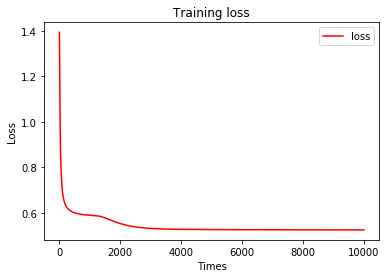

预测结果：
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
真实结果：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
准确率：73.77%


In [6]:
# 对模型进行测试
drow(history)
predict(parameters, X_test, y_test)